In [1]:
import os
import torch
import numpy as np
import torchvision
from PIL import Image
import matplotlib.pyplot as plt

import torchvision.transforms as T
import torch.nn.functional as F

from ig_pkg.datasets import get_datasets

from ig_pkg.models.generator import get_model
from ig_pkg.models.classifier import get_classifier
from ig_pkg.models.pretrained_models import get_pretrained_model

from ig_pkg.inputattribs.ig import make_interpolation, ig
from ig_pkg.inputattribs.baseline_generator import get_baseline_generator

from ig_pkg.misc import process_heatmap, normalize_tensor, convert_to_img, convert_mask_img, label_to_class, tran, na_imshow

import time
import torch.nn as nn
import torch.optim as optim
from torch.optim.lr_scheduler import StepLR
from ig_pkg.loss.focal_loss import FocalLoss
from ig_pkg.loss.metrics import ArcMarginProduct, AddMarginProduct

import torchvision.models as models
from torch.autograd import Variable


IMAGENET_MEAN = [0.485, 0.456, 0.406]
IMAGENET_STD  = [0.229, 0.224, 0.225]

my_cmap=plt.cm.seismic(np.arange(plt.cm.seismic.N))
device = 'cuda:2'

In [2]:
import torchvision.transforms as T
CIFAR10_STATS = {
    'mean' : [0.4914, 0.4822, 0.4465],
    'std' : [0.2023, 0.1994, 0.2010]
}

transform = T.Compose([
                T.ToTensor(), 
                T.Normalize(CIFAR10_STATS['mean'], CIFAR10_STATS['std'])
            ])

valid_dataset = torchvision.datasets.CIFAR10(root='/data8/donghun/cifar10/untracked/', train=False, transform=transform)
# valid_dataset = torchvision.datasets.CIFAR10(root='/root/data/cifar10', train=False, transform=transform)
# interpolation = torch.from_numpy(np.load('/root/results/cifar10/image_simple_gradient_ascent_interpolation.npy'))

classifier = torch.load("/data8/donghun/cifar10/results/densenet/script_model.pt",  map_location='cpu').eval().to(device)
# model = torch.load("/root/data/cifar10/cifar10/results/densenet/script_model.pt",  map_location='cpu').eval().to('cuda:0')


/home/dhlee/anaconda3/envs/dh1/lib/python3.8/site-packages/torch/serialization.py:779: UserWarning: 'torch.load' received a zip file that looks like a TorchScript archive dispatching to 'torch.jit.load' (call 'torch.jit.load' directly to silence this warning)
  warnings.warn("'torch.load' received a zip file that looks like a TorchScript archive"


Bottelneck AE

In [7]:
model = torch.load("../ig_pkg/bottleneck_ae/results/model_best.pt", map_location='cpu')

# bottle = torch.load("/data8/donghun/cifar10/bottleneck_ae/results/model_best.pt", map_location='cpu')#.eval().to(device)
# model = torch.load("/home/dhlee/code/ig_inversion/bottleneck_ae/results/model_best.pt", map_location='cpu').eval().to(device)
# inputs = torch.randn(1, 1, 32, 32)
# outputs = model(inputs)
# x_hat, loss_dict, info = outputs 

# print("input: ", inputs.size())
# print("bottlenekc:", (info['bottleneck']))
# print("decode:",  model.decode(info['bottleneck']).size())

AttributeError: Can't get attribute 'BottleneckAE' on <module 'bottleneck_ae' (namespace)>

In [8]:
temp = torch.load('/home/dhlee/code/ig_inversion/untracked/tensor.pt')
temp.shape

torch.Size([25, 3, 32, 32])

In [9]:
temp[0].shape

torch.Size([3, 32, 32])

In [11]:
interp = torch.from_numpy(np.load('/home/dhlee/code/ig_inversion/results/cifar10/image_flat_{args.type}_linear_interpolation.npy'))
print(interp.shape)


torch.Size([12, 25, 3, 32, 32])


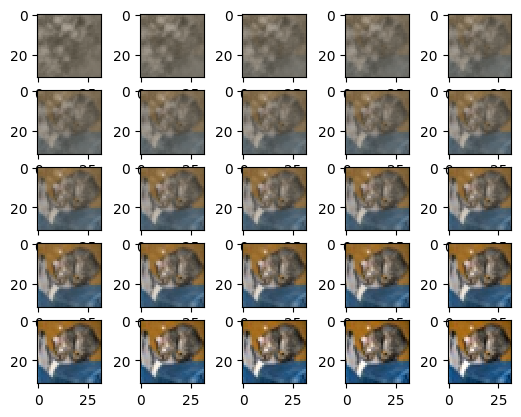

In [13]:
fig, axes = plt.subplots(5, 5)
axes_flat = axes.flat

for i in range(25):
    axe = next(axes_flat)
    axe.imshow(convert_to_img(interp[0][i]))

In [16]:
for i in range(25):
    print(f'\'{i}\': \'/home/dhlee/results/cifar10/image_flat_{i}_linear_attribution.npy\',')

'0': '/home/dhlee/results/cifar10/image_flat_0_linear_attribution.npy',
'1': '/home/dhlee/results/cifar10/image_flat_1_linear_attribution.npy',
'2': '/home/dhlee/results/cifar10/image_flat_2_linear_attribution.npy',
'3': '/home/dhlee/results/cifar10/image_flat_3_linear_attribution.npy',
'4': '/home/dhlee/results/cifar10/image_flat_4_linear_attribution.npy',
'5': '/home/dhlee/results/cifar10/image_flat_5_linear_attribution.npy',
'6': '/home/dhlee/results/cifar10/image_flat_6_linear_attribution.npy',
'7': '/home/dhlee/results/cifar10/image_flat_7_linear_attribution.npy',
'8': '/home/dhlee/results/cifar10/image_flat_8_linear_attribution.npy',
'9': '/home/dhlee/results/cifar10/image_flat_9_linear_attribution.npy',
'10': '/home/dhlee/results/cifar10/image_flat_10_linear_attribution.npy',
'11': '/home/dhlee/results/cifar10/image_flat_11_linear_attribution.npy',
'12': '/home/dhlee/results/cifar10/image_flat_12_linear_attribution.npy',
'13': '/home/dhlee/results/cifar10/image_flat_13_linear_at

In [ ]:
device = 'cuda:0'
names = {
    'zero',
    'one',
    'min',
    'max',
    'scalar',
#     'encoder',
#     'optimizer',
#     'hybrid',
    'gaussian_blur',
    'gaussian',
    'uniform',
    'maximumdistance' 
}

# {'gaussian',
#  'gaussian_blur',
#  'max',
#  'maximumdistance',
#  'min',
#  'one',
#  'scalar',
#  'uniform',
#  'zero'}

index = 0 
# x,y = valid_datasets[index]
x = ferrot_tensor
y = 359

fig, axes = plt.subplots(2, (len(names)//2)+1, figsize=(2*len(names)//2, 2*2))
axes_flat = axes.flat 
my_cmap=plt.cm.seismic(np.arange(plt.cm.seismic.N))

ax = next(axes_flat)
ax.imshow(convert_to_img(x))

AOPC = []
LODDs = []
Kendal = []
for name in names:
    print(name)
    a = []
    b = []
    try:
        b_generator =  get_baseline_generator(name, scalar = 0.3)
        baseline = b_generator(x=x,y=y)

    except Exception as e: 
        print("-----")
        print("fail:", name)
        print(e)
        continue
        
    attr = ig(eval_mode.to(device), x, y, baseline, device=device)
    Kendal.append(kendal_correlation(eval_mode, ferrot_tensor, baseline, attr.detach().cpu().numpy(), device))

#     print(name)
    for i in range(19):
#         k = i * 5 + 5        
        k = i + 1
        aopc, lodds = pipeline(eval_mode, ferrot_tensor.to(device), baseline, attr, k, device, name)
        
#         print(name, k, aopc, lodds)
        a.append(aopc)
        b.append(lodds)
    
    attr, kwargs  = process_heatmap(attr.cpu(), my_cmap)
    ax = next(axes_flat)
    ax.imshow(attr, **kwargs)
    ax.set_title(name)
    ax.axis("off")
    
    AOPC.append(a)
    LODDs.append(b)    
    
plt.tight_layout()